In [1]:
import sys
sys.path.append('..')
from QAOA import QAOArunner
from MaxCutProblem import MaxCutProblem
import params
from rustworkx.visualization import mpl_draw as draw_graph
from load_data import load_graph_from_csv

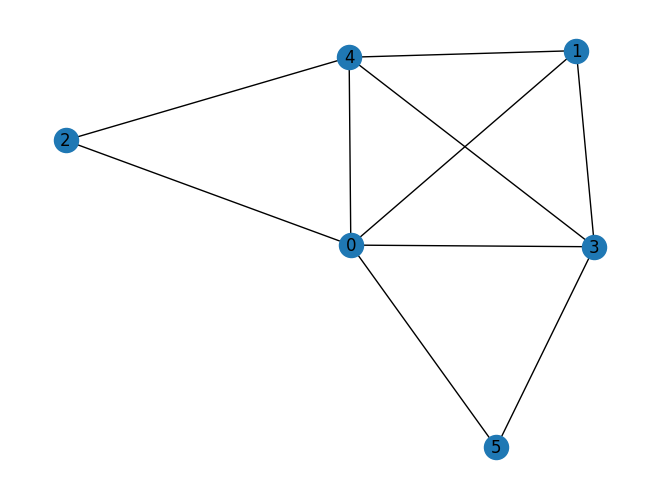

In [2]:
problem = MaxCutProblem()
graph = problem.get_graph(6, create_random=True,random_weights=True)
#graph = load_graph_from_csv('data/11_nodes_links_scand.csv')
draw_graph(graph, with_labels=True)

In [46]:
import ast
with open("../test_settings.txxt", "r", encoding="UTF-16") as f:
    settings = f.read().strip()
print(settings)


[('uniform', 'COBYLA', 'vanilla', False, False), ('uniform', 'COBYLA', 'vanilla', False, True), ('uniform', 'COBYLA', 'vanilla', True, False), ('uniform', 'COBYLA', 'vanilla', True, True), ('uniform', 'COBYLA', 'multiangle', False, False), ('uniform', 'COBYLA', 'multiangle', False, True), ('uniform', 'COBYLA', 'multiangle', True, False), ('uniform', 'COBYLA', 'multiangle', True, True), ('gaussian', 'COBYLA', 'vanilla', False, False), ('gaussian', 'COBYLA', 'vanilla', False, True), ('gaussian', 'COBYLA', 'vanilla', True, False), ('gaussian', 'COBYLA', 'vanilla', True, True), ('gaussian', 'COBYLA', 'multiangle', False, False), ('gaussian', 'COBYLA', 'multiangle', False, True), ('gaussian', 'COBYLA', 'multiangle', True, False), ('gaussian', 'COBYLA', 'multiangle', True, True)]


In [45]:
import itertools
param_initialization = ['uniform','gaussian']
optimizer = ['COBYLA']
qaoa_variant = ['vanilla', 'multiangle']
warm_start = [False,True]
errors = [False,True]

iterables = [param_initialization, optimizer, qaoa_variant,warm_start,errors] 
settings = list(itertools.product(*iterables))
print(settings)

[('uniform', 'COBYLA', 'vanilla', False, False), ('uniform', 'COBYLA', 'vanilla', False, True), ('uniform', 'COBYLA', 'vanilla', True, False), ('uniform', 'COBYLA', 'vanilla', True, True), ('uniform', 'COBYLA', 'multiangle', False, False), ('uniform', 'COBYLA', 'multiangle', False, True), ('uniform', 'COBYLA', 'multiangle', True, False), ('uniform', 'COBYLA', 'multiangle', True, True), ('gaussian', 'COBYLA', 'vanilla', False, False), ('gaussian', 'COBYLA', 'vanilla', False, True), ('gaussian', 'COBYLA', 'vanilla', True, False), ('gaussian', 'COBYLA', 'vanilla', True, True), ('gaussian', 'COBYLA', 'multiangle', False, False), ('gaussian', 'COBYLA', 'multiangle', False, True), ('gaussian', 'COBYLA', 'multiangle', True, False), ('gaussian', 'COBYLA', 'multiangle', True, True)]


In [ ]:
quantum = QAOArunner(graph=graph, 
                     simulation=True,
                     param_initialization= 'gaussian',
                     qaoa_variant='vanilla', 
                     optimizer='COBYLA',
                     warm_start=False,
                     restrictions = False,
                     )

quantum.build_circuit()
print(quantum.solver.get_qp().variables)
quantum.run()
print(quantum.solution)
print(quantum.evaluate_sample())


You are running on the local simulator:  fake_brisbane
[<Variable: x_0 (binary)>, <Variable: x_1 (binary)>, <Variable: x_2 (binary)>, <Variable: x_3 (binary)>, <Variable: x_4 (binary)>, <Variable: x_5 (binary)>]
job.result() PrimitiveResult([PubResult(data=DataBin(evs=np.ndarray(<shape=(), dtype=float64>), stds=np.float64(0.0754993111704072)), metadata={'target_precision': 0.03162277660168379, 'shots': 1001, 'circuit_metadata': {}})], metadata={'version': 2})
results PubResult(data=DataBin(evs=np.ndarray(<shape=(), dtype=float64>), stds=np.float64(0.0754993111704072)), metadata={'target_precision': 0.03162277660168379, 'shots': 1001, 'circuit_metadata': {}})
0.0754993111704072


IndexError: invalid index to scalar variable.

In [ ]:
print({ 'time_elapsed': quantum.time_elapsed, 'quantum_func_evals': quantum.fev, 'obj_func_evolution': quantum.objective_func_vals,
        'quantum_solution':quantum.solution, 'quantum_obj_value' : quantum.objective_value})

{'time_elapsed': 460.7108829021454, 'quantum_func_evals': 139, 'obj_func_evolution': [], 'quantum_solution': array([1., 0., 1., 1., 0., 0.]), 'quantum_obj_value': np.float64(3.947993639475385)}


In [ ]:
print(quantum.rqaoa._optimizer._min_eigen_solver)

In [ ]:
import itertools

iterables = [params.supported_qaoa_variants, params.supported_param_inits]

settings = []
for t in itertools.product(*iterables):
    settings.append(t)
for params in settings:
    print('Params:', params)
    qaoa = QAOArunner(graph, simulation=True, param_initialization=params[1],qaoa_variant=params[0])
    qaoa.build_circuit()
    qaoa.run()

Params: ('vanilla', 'uniform')
You are running on the local simulator:  fake_brisbane


KeyboardInterrupt: 

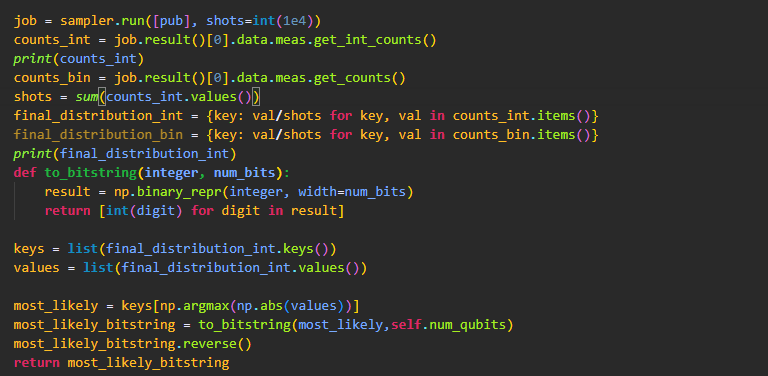

In [ ]:
#the data given here is the "job" from the picture above
data = qaoa.get_data_structures()


ValueError: The number of values (0) does not match the number of parameters (6) for the circuit. Note that if you want to run a single pub, you need to wrap it with `[]` like `sampler.run([(circuit, param_values)])` instead of `sampler.run((circuit, param_values))`.

In [ ]:
from solver import Solver


solver = Solver(graph, restrictions=False)
quantum.compare_solutions(solver.solve())

Result quantum [1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0] Objective value:  14
Result input (classical) [0, 1.0, 1.0, 0, 0, 1.0, 0, 1.0, 0, 0, 1.0] Objective Value:  14.0
Same solution True
Same objective function value:  True


In [ ]:
quantum.get_prob_distribution()

{933: 11, 1210: 84, 422: 68, 1008: 13, 427: 10, 752: 20, 857: 204, 53: 1, 1649: 36, 665: 3, 838: 47, 741: 8, 854: 4, 1710: 8, 1214: 29, 837: 82, 1190: 176, 345: 14, 1182: 33, 1654: 4, 881: 117, 1208: 23, 438: 20, 969: 14, 1137: 5, 824: 20, 1242: 115, 589: 2, 346: 12, 1233: 23, 1189: 37, 1162: 5, 653: 7, 816: 5, 1776: 13, 1253: 11, 828: 25, 1350: 16, 1446: 33, 1613: 5, 1589: 13, 625: 21, 1383: 16, 825: 103, 1528: 1, 1161: 9, 327: 13, 270: 5, 1230: 23, 1291: 19, 780: 8, 1232: 19, 769: 4, 1696: 1, 1251: 41, 1164: 5, 796: 32, 1254: 56, 473: 10, 785: 15, 710: 20, 806: 75, 843: 65, 1752: 28, 1475: 1, 1195: 34, 1861: 10, 331: 24, 1573: 67, 1274: 12, 813: 48, 822: 15, 1597: 5, 1123: 17, 1721: 11, 1777: 6, 1327: 20, 1191: 59, 1319: 43, 782: 40, 1549: 25, 1355: 56, 501: 1, 948: 36, 924: 8, 176: 1, 569: 17, 369: 8, 548: 3, 483: 9, 798: 6, 1701: 11, 1163: 29, 1690: 2, 692: 56, 286: 4, 1265: 44, 430: 35, 1412: 1, 1012: 13, 1379: 17, 1294: 15, 1169: 4, 1741: 1, 1158: 11, 218: 14, 182: 10, 826: 21, 1

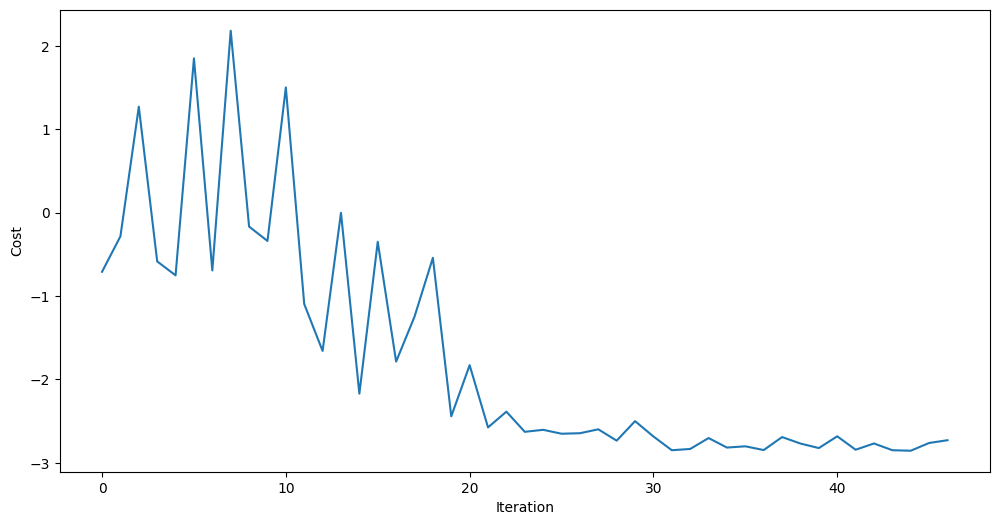

In [ ]:
quantum.draw_objective_value()

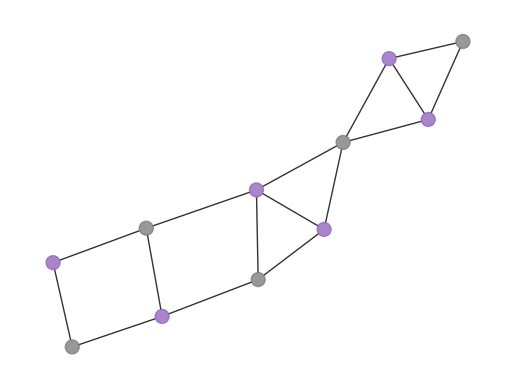

In [ ]:
quantum.plot_result()

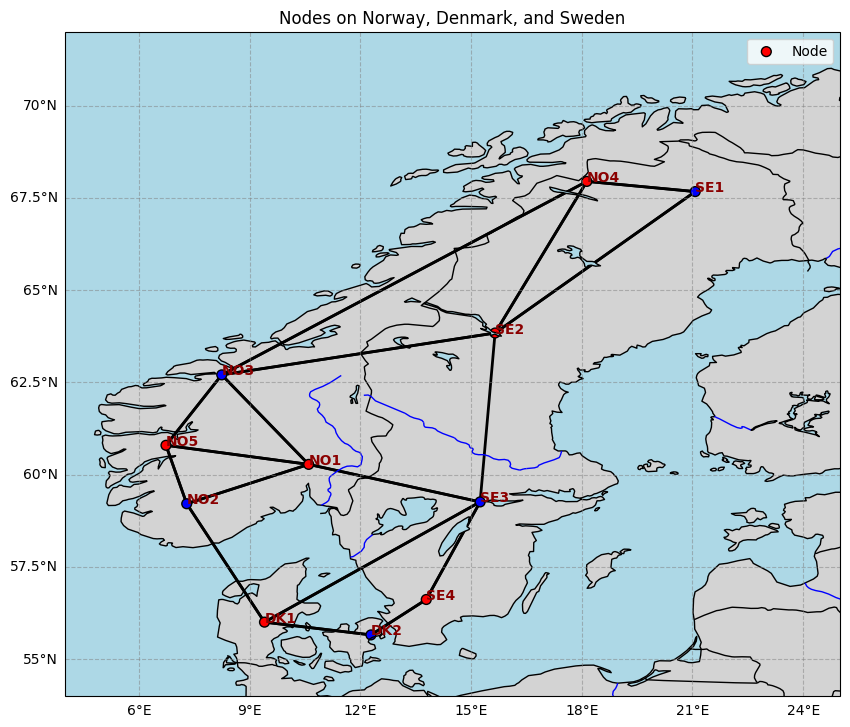

In [ ]:
import csv

import numpy as np
import rustworkx as rx
from rustworkx import is_connected
from rustworkx.visualization import mpl_draw as draw_graph
import pandas as pd
#import geopandas as gpd
#import cartopy.feature as cfeature

#import cartopy.crs as ccrs
import matplotlib.pyplot as plt

def load_edges_verbose(file_path):
    df = pd.read_csv(file_path,delimiter=';',index_col=0)
    result = [(row, col, 1) for (row, col), value in df.stack().items() if value == 1]
    return result


def draw_nodes_on_cartopy(file_path, bitstring=None):
    
    df = pd.read_csv(file_path, delimiter=';')
    edges = load_edges_verbose('data/11_nodes_links_scand.csv')
    
    # Rename the first column
    df.rename(columns={df.columns[0]: 'name'}, inplace=True)
    # Set up a GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['y'], df['x']))

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

    # Add map features
    ax.set_extent([4, 25, 54, 72], crs=ccrs.PlateCarree())  # Set the extent to cover Norway, Denmark, Sweden
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
    ax.add_feature(cfeature.COASTLINE, edgecolor='black')
    ax.add_feature(cfeature.LAKES, facecolor='lightblue', edgecolor='black')
    ax.add_feature(cfeature.RIVERS, edgecolor='blue')
    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
  
    # Plot nodes on the map
    
    
    for start_label, end_label, weight in edges:
        start_coords = (df[df['name']==start_label]['y'], df[df['name']==start_label]['x'])
        end_coords = (df[df['name']==end_label]['y'], df[df['name']==end_label]['x'])
        ax.plot(
            [start_coords[0], end_coords[0]],  # x-coordinates (longitudes)
            [start_coords[1], end_coords[1]],  # y-coordinates (latitudes)
            color='black', linewidth=1 + weight, transform=ccrs.PlateCarree(), zorder=1
        )
    if bitstring is not None:
        colors = ['red' if bit == 1 else 'blue' for bit in bitstring]
    else:
        colors = 'red'
    
    gdf.plot(ax=ax, color=colors, markersize=50, transform=ccrs.PlateCarree(), edgecolor='black', label='Node')

    for idx, row in gdf.iterrows():
        ax.text(row.geometry.x + 0.005, row.geometry.y, row['name'], transform=ccrs.PlateCarree(),
                ha='left', fontsize=10, color='darkred', fontweight='bold')

    
    plt.legend()
    plt.title("Nodes on Norway, Denmark, and Sweden")
    plt.show()
draw_nodes_on_cartopy('data/11_nodes_coords_scand.csv', bitstring=quantum.solution)



